Alex Medina | Problem Set #3 - Problem #2

The mass loss rate of AGB stars is very uncertain. This rate has been parameterised by semiempirical calibrations, as well as with hydrodynamical simulations. The empirical calibrations differ from one another, and from those from the stellar evolution models.

- Download DARWIN stellar models (accompanied by the ReadMe file)
- To calculate mass loss rate, refer to: https://arxiv.org/pdf/1805.05164

**Part a:**

- Show three histograms corresponding to the mass loss rates calculated with:
    - Reimers formula
    - Van Loon equation
    - That are given in the online table of the DARWIN stellar models
- How do they compare? By what factor do the rates differ from one another, on average?

In [1]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.constants import sigma
import matplotlib.pyplot as plt

#Constants
L_sun = 3.828e26  #Solar luminosity in Watts
R_sun = 6.957e8   #Solar radius in meters
M_sun = 1.989e30  #Solar mass in kg

In [2]:
#Reading the file
df = pd.read_csv('mgridsol.dat.txt', sep='\s+', header=None)
df.columns = [
    'Mass', 'log_L', 'Teff', 'Per', 'up', 'fL', 'log_nd_nH', 'dM/dt',
    'uinf', 'agr', 'fSi', 'gtd'
]

In order to obtain mass loss rates (in $M_*/yr$), adopt a modified version of Reimers formula:

\begin{equation}
\frac{dM}{dt} = 4 \times 10^{-13} \eta \frac{(L/L_*)(R/R_*)}{M/M_*}

\end{equation}

In [3]:
def reimer(L, R, M):
    #In mgridsol.dat.txt, luminosity is already in units of L_*
    #So is mass
    c = 4e-13
    eta = 1e-13

    #R is not in the file but will calculate and normalize to R_* later
    return c * eta * (L * R) / M

In van Loon et al. (2005) the mass loss rates were derived using a dust radiative transfer code applied to infrared photometry data to obtain the spectral energy distribution. The derived equation can be written as:

\begin{equation}
log \frac{dM}{dt} = \alpha + \beta log \frac{L}{10000 L_*} + \gamma log \frac{T_{eff}}{3500K}
\end{equation}

where $\alpha = -5.64 +- 0.15$, $\beta = 1.05 +- 0.14$, and $\gamma = -6.3 +- 1.2$.

In [4]:
#Van Loon coefficients from the paper (assumed example)
alpha = -5.65
beta = 1.05
gamma = -6.3

def vanloon(L, Teff):
    #Teff in units of K
    log_dMdt = alpha + beta * np.log(L / 10000) + gamma * np.log(Teff / 3500)
    return 10**log_dMdt


Before procedding with part a, mgridsol doesn't have radius, but we can calculate it using the luminosity:

\begin{equation}
L = 4 \pi R^2 \sigma T^4
\end{equation}

such that

\begin{equation}
R = \sqrt{\frac{L}{4 \sigma T^4}}
\end{equation}

In [5]:
#Computing the radius
#First, L is in Log form so taking it out of Log form
df['L'] = 10**df['log_L']
#Un-normalizing the L because it is in units of L_sun
df['L_watts'] = df['L'] * L_sun

#Finally computing raw R
df['R_m'] = np.sqrt(df['L_watts'] / (4 * np.pi * sigma * df['Teff']**4))
#And normalizing it with R_sun
df['R'] = df['R_m'] / R_sun  # In units of R_sun

In [6]:
#So now we have L, R and M normalizing with the sun, and Teff as is
df['reimers'] = reimer(df['L'], df['R'], df['Mass'])
df['vanloon'] = vanloon(df['L'], df['Teff'])

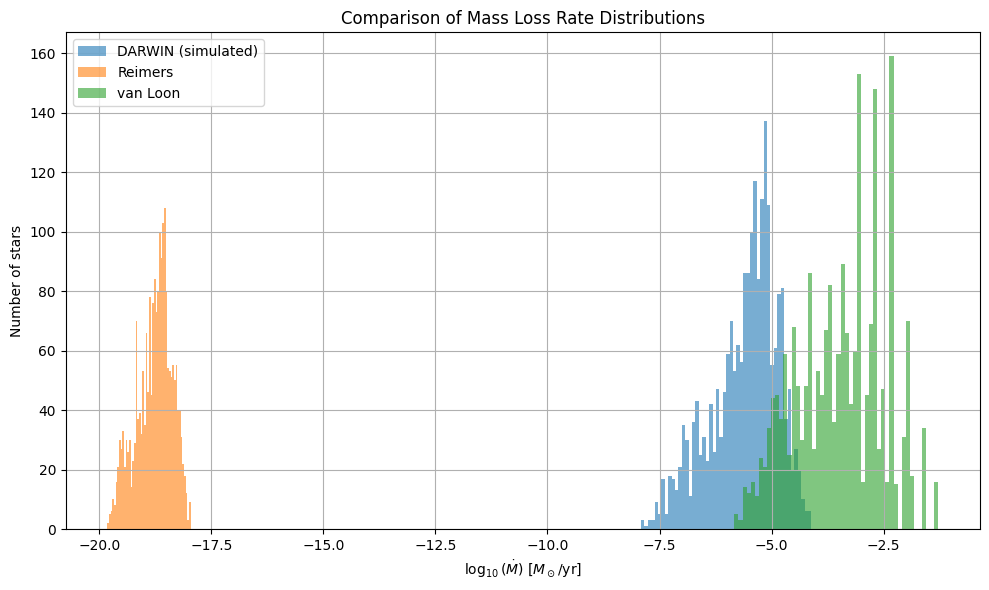

In [7]:
#To create histograms of log10 of the mass loss rates for comparison
plt.figure(figsize=(10, 6))

plt.hist(np.log10(df['dM/dt']), bins=50, alpha=0.6, label='DARWIN (simulated)')
plt.hist(np.log10(df['reimers']), bins=50, alpha=0.6, label='Reimers')
plt.hist(np.log10(df['vanloon']), bins=50, alpha=0.6, label='van Loon')

plt.xlabel(r'$\log_{10}(\dot{M})$ [$M_\odot$/yr]')
plt.ylabel('Number of stars')
plt.title('Comparison of Mass Loss Rate Distributions')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Part b:**

Comparing the mass loss rates directly by showing
- Mass loss from the Reimers versus van Loon
- Mass loss from the Reimers versus simulation 
- Mass loss from van Loon versus simulation

C:\Users\Alex\AppData\Local\Temp\ipykernel_20684\2890477860.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


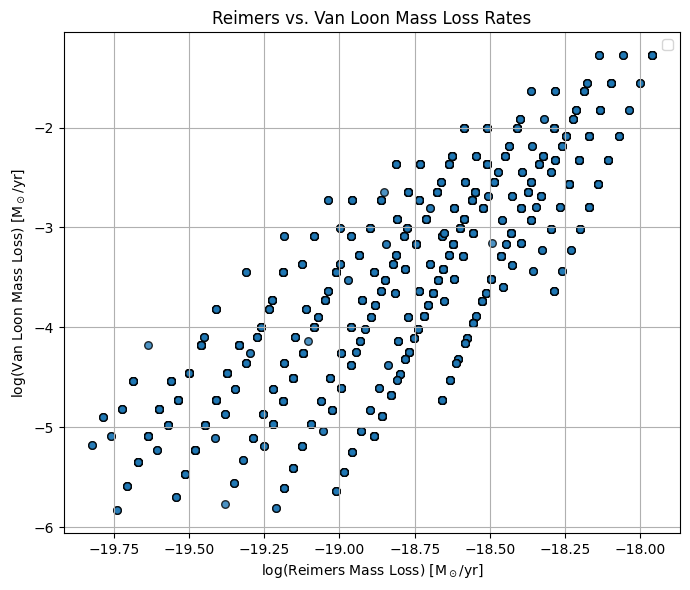

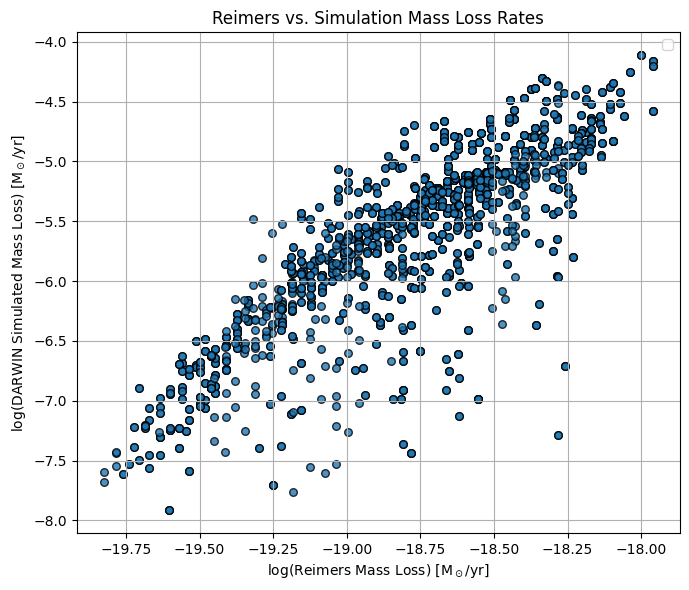

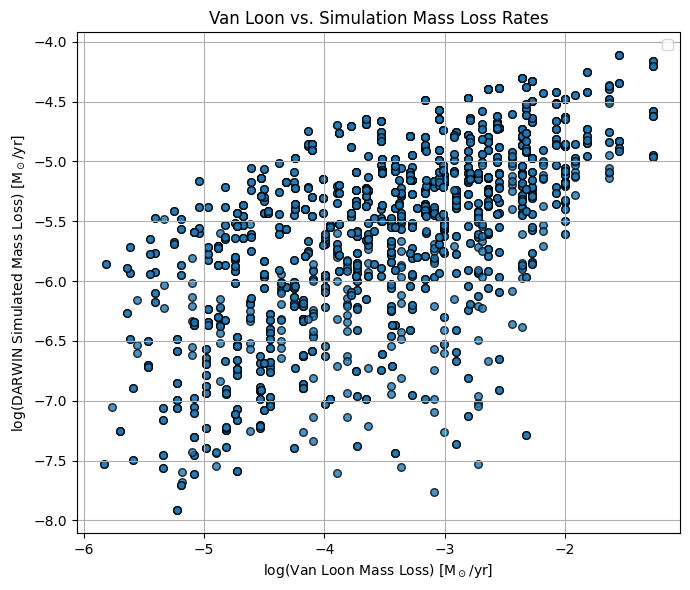

In [8]:
#Define a helper to make clean scatter plots
def plot_mass_loss(x, y, xlabel, ylabel, title):
    plt.figure(figsize=(7, 6))
    sc = plt.scatter(np.log10(x), np.log10(y), alpha=0.8, edgecolor='k', s=30)
    plt.xlabel(f'log({xlabel}) [M$_\odot$/yr]')
    plt.ylabel(f'log({ylabel}) [M$_\odot$/yr]')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#Reimers vs. Van Loon
plot_mass_loss(
    df['reimers'], df['vanloon'],
    'Reimers Mass Loss', 'Van Loon Mass Loss',
    'Reimers vs. Van Loon Mass Loss Rates'
)

#Reimers vs. simulation
plot_mass_loss(
    df['reimers'], df['dM/dt'],
    'Reimers Mass Loss', 'DARWIN Simulated Mass Loss',
    'Reimers vs. Simulation Mass Loss Rates'
)

#van Loon vs. simulation
plot_mass_loss(
    df['vanloon'], df['dM/dt'],
    'Van Loon Mass Loss', 'DARWIN Simulated Mass Loss',
    'Van Loon vs. Simulation Mass Loss Rates'
)


For the first graph, Reimers formula lacks temperature dependence, while van Loon explicitly penalizes high temperature.


The most likely and similar two are the Van Loon and simulated graph.